# Checkpoint 1 Data Cleaning

 Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt

Trying to decode the encoding that we should use

In [172]:

import chardet

In [173]:
with open ("rounds2.csv",'rb') as rawdata:
    result =chardet.detect(rawdata.read())
    
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


Since we are not confident about result here we will try different combinations and read the file

Reading the files

In [174]:

companies = pd.read_csv("companies.csv", encoding= 'ISO-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [175]:

rounds2 = pd.read_csv("rounds2.csv", encoding= 'unicode_escape')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Understand the Data Set
How many unique companies are present in rounds2?	
How many unique companies are present in companies?	                       
In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	 
Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 
Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [176]:
#Check the shape of the dataframe
companies.shape

(66368, 10)

In [177]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Ringerscommunications,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [178]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [179]:
len(companies['name'].unique())

66100

In [180]:
#Converting into lower so as to get rid of issues related to case sensitivity
companies['name'] = companies['name'].str.lower()

In [181]:
Companies_c = len(companies['name'].unique())
Companies_c

66035

###### There are 66035 unique companies in companies dataset

In [182]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [183]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [184]:
#Comverting into lower so that we wont face any issue in joining the datasets
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [185]:
companies_r = len(rounds2['company_permalink'].unique())
companies_r

66370

###### There are 66370 unique companies in round2

In [186]:
companies['permalink'] = companies['permalink'].str.lower()

###### Yes, commany_permalink or permalink are unique so we are going to join on the basis of that

###### Yes there are companies in the rounds2 file which are not present in companies which is evident from count of companies shown above, also it can be validated by below approach

In [187]:
#merging the dataframe 
master_frame = pd.merge(rounds2,companies, how = "inner", left_on = "company_permalink" , right_on = "permalink" )
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [188]:
master_frame.shape

(114942, 16)

###### There are 114942 Observation present in master frame after merging

In [189]:
# Converting into date format so that we can get the month out of this date
master_frame['funded_at'] = pd.to_datetime(master_frame['funded_at']).dt.month

In [190]:
#Converting $ to million $.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,10,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1,0.700000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,1,3.406878,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,3,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [191]:
## Creatiing pivot table in order to have stack bar chart in place for our required targeted funding round type
master_frame_a = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
a = pd.pivot_table(data=master_frame_a, values="raised_amount_usd", index="funded_at", columns="funding_round_type", aggfunc=sum)

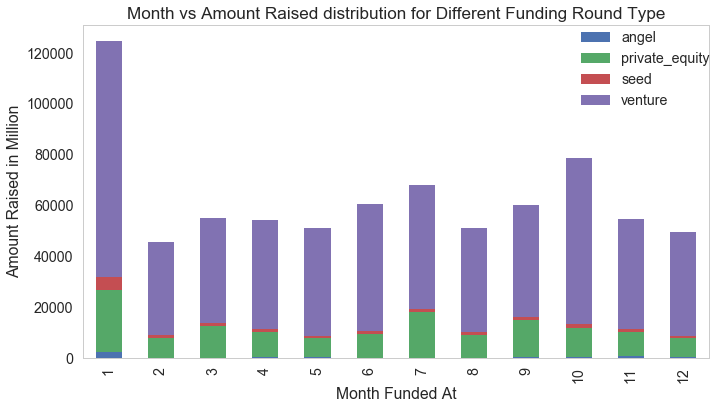

In [192]:
##Plot the stacked bar chart.
px= a.plot(kind="bar", stacked="True", figsize=[10,6])
sns.set_context("talk", font_scale=1.1)
sns.set_style("whitegrid")
figsize=(30, 20)
plt.setp(px.get_legend().get_texts(), fontsize='18') #
px.grid(False)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Month vs Amount Raised distribution for Different Funding Round Type")
plt.tight_layout()

plt.ylabel("Amount Raised in Million")
plt.xlabel("Month Funded At")
plt.show()


###### Observation -  For Venture we can see the amount raised is maximum all across the month

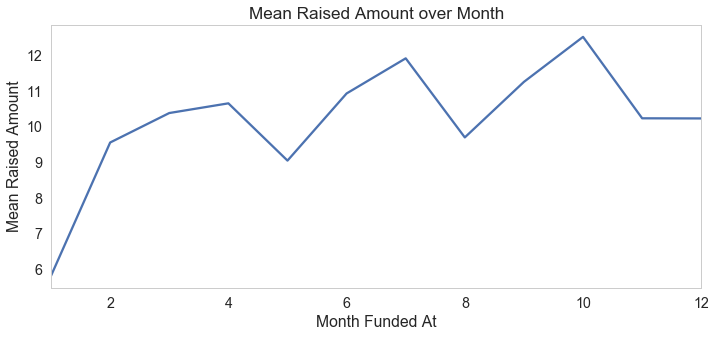

In [193]:
## Plot a line graph
plt.figure(figsize=[10,5])
gx = master_frame_a.groupby(['funded_at'])['raised_amount_usd'].mean().plot()
gx.grid(False)
plt.title("Mean Raised Amount over Month")
plt.tight_layout()

plt.ylabel("Mean Raised Amount")
plt.xlabel("Month Funded At")
plt.show()

###### Observation - We can see that after 3 months there is dip in raised amount and then it increases and overall trend is positive

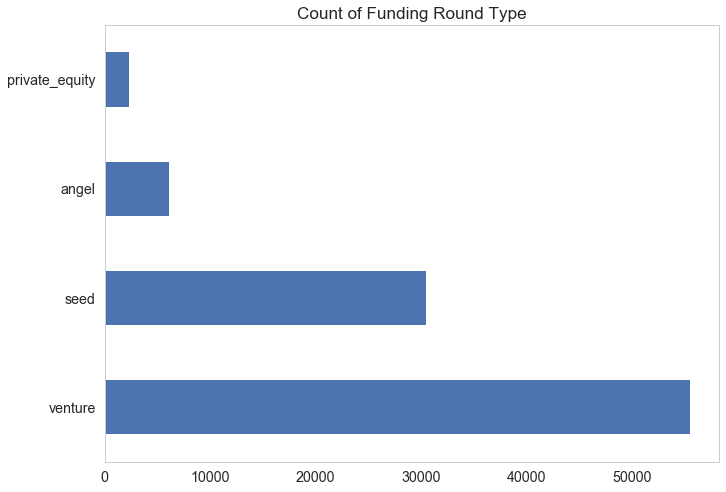

In [194]:
g = master_frame_a['funding_round_type'].value_counts().plot.barh()
g.grid(False)
plt.title("Count of Funding Round Type")
plt.show()


###### Observation - Venture has maximum number of investors

###### Master Frame is created

In [195]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [196]:
master_frame.shape

(114942, 6)

In [197]:
master_frame.shape

(114942, 6)

Missing Value treatment

lets look the fraction of data missing

In [198]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.96
country_code           7.54
dtype: float64

## Checkpoint 2: Funding Type Analysis

In [199]:
master_frame["raised_amount_usd"].describe()

count    94958.000000
mean        10.426962
std        114.821849
min          0.000000
25%          0.322500
50%          1.680521
75%          7.000000
max      21271.935000
Name: raised_amount_usd, dtype: float64

In [200]:
#Retaining the rows with only four investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [201]:
master_frame.shape

(94390, 6)

In [202]:
median = master_frame["raised_amount_usd"].median()
print(median)

2.0


In [203]:

# Dropping null values from raised_amount_usd column
master_frame.drop(master_frame[master_frame['raised_amount_usd'].isnull()].index, inplace = True)
#master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"].fillna(median)

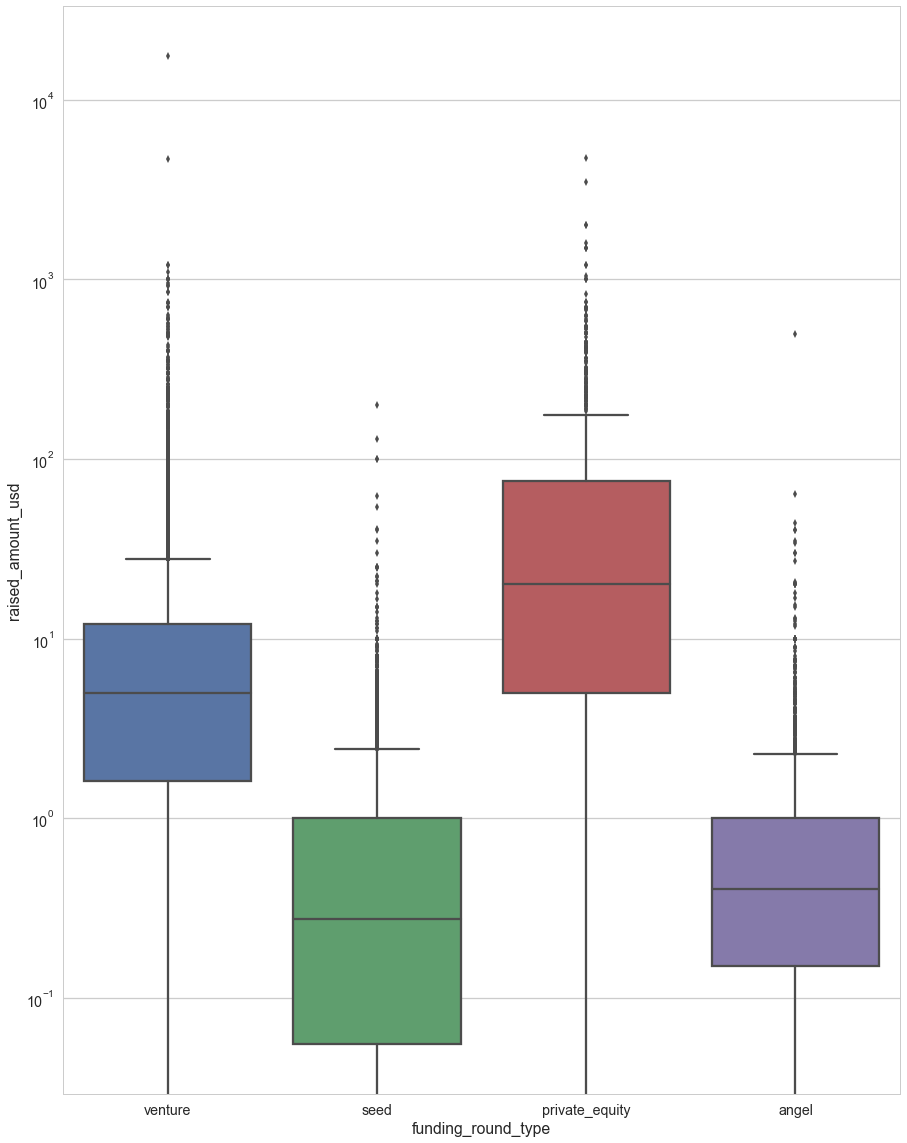

In [204]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[15,20])
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

###### Venture and angel round type are having less spread while seed and private equity are having more spread. Private equity is having maximum median. For venture, amount is little skewed that means little more investment on higher side that are pulling the median up 

In [205]:
master_frame.shape

(80626, 6)

In [206]:
master_frame['category_list'].fillna(master_frame['category_list'].mode()[0], inplace=True)

In [207]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
name                  0.00
category_list         0.00
country_code          6.23
dtype: float64

In [208]:
master_frame.shape

(80626, 6)

In [209]:
master_frame.describe()

,raised_amount_usd
count,80626.000000
mean,9.348091
std,75.629862
min,0.000000
25%,0.400000
50%,2.000000
75%,7.976016
max,17600.000000


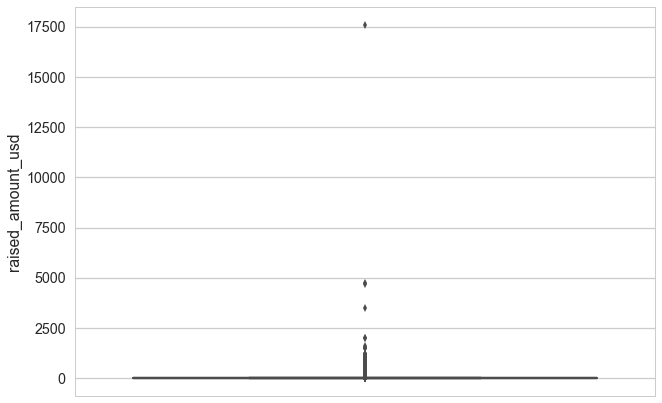

In [210]:

sns.boxplot(y=master_frame['raised_amount_usd'])
#plt.yscale('log')
plt.show()


There are outliers near about 17500 Million and above 1000 million

In [211]:
Q1 = master_frame['raised_amount_usd'].quantile(0.25)
Q3 = master_frame['raised_amount_usd'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7.57601575


In [212]:
print(master_frame['raised_amount_usd'].quantile(0.10))
print(master_frame['raised_amount_usd'].quantile(0.90))

0.075
20.0


In [213]:
high = master_frame[master_frame.raised_amount_usd > 20]
high.shape

(7462, 6)

There are 7462 companies that can act as outlier on higher side

In [214]:
low = master_frame[master_frame.raised_amount_usd < 0.075]
low.shape

(7989, 6)

There are 7989 companies that can act as outlier on ligher side 

Around 15500 companies that may act as outlier as per business need. But as of now for out analysis we are not touching them and leting business team to take action if needed

In [215]:
sorted_by_amount = master_frame.sort_values(by = 'raised_amount_usd' , ascending = False)
sorted_by_amount.head(10)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
37567,/organization/freescale,venture,17600.000000,freescale semiconductor,Semiconductors,USA
75528,/organization/ping-an,private_equity,4745.460219,ping an,Banking|Financial Services|Insurance|Investmen...,CHN
60203,/organization/mediavast,venture,4700.000000,mediavast,Advertising|Broadcasting|Content,USA
35769,/organization/first-data-corporation,private_equity,3500.000000,first data corporation,Payments|Trading,USA
27550,/organization/didi-dache,private_equity,2000.000000,didi kuaidi,Public Transportation|Transportation,CHN
4368,/organization/alibaba,private_equity,2000.000000,alibaba,E-Commerce,CHN
4369,/organization/alibaba,private_equity,1600.000000,alibaba,E-Commerce,CHN
34405,/organization/facebook,private_equity,1500.000000,facebook,All Students|Colleges|Communities|Identity|Soc...,USA
3767,/organization/airbnb,private_equity,1500.000000,airbnb,Hotels|Travel,USA
106174,/organization/venari-resources,private_equity,1498.515340,venari resources,Oil and Gas,USA


We can see companies where exceptionally large amount is raised. one of the example is 17600 Million investment in freescale so taking medain would make more sense in this scenario instead of relying mean

###### Since there are outliers present so ,  Most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity are going to be find aout using medain below :

In [216]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)


funding_round_type
private_equity    20.000
venture            5.000
angel              0.400
seed               0.275
Name: raised_amount_usd, dtype: float64

###### Representative value for Private equity = 20 Million , Venture - 5 Million , Angel - .4 Million  , Seed - .27 Million

In [217]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)


funding_round_type
private_equity    73.308593
venture           11.748949
angel              0.958694
seed               0.719780
Name: raised_amount_usd, dtype: float64

###### As the constraint that spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for Private_Equity

In [218]:
##creating copy for the reference
master_frame_all = master_frame

In [219]:
#Retaining rows with only venture type. As Spark Funds wants to invest between 5 to 15 million USD per investment round
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [220]:
master_frame.shape

(50228, 6)

# Checkpoint 3: Country Analysis

The top nine countries which have received the highest total funding

In [221]:

top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
#top9 = top9.iloc[:9, ]
#top9
top9 = top9.iloc[:9,]
top9

,raised_amount_usd
country_code,
USA,422510.842796
CHN,39835.418773
GBR,20245.627416
IND,14391.858718
CAN,9583.332317
FRA,7259.536732
ISR,6907.514579
DEU,6346.959822
JPN,3363.676611


###### top three English-speaking countries in the data frame top9 are USA, Great Britain (GBR) and India

In [222]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]


In [223]:
master_frame.shape

(39018, 6)

# Checkpoint 4: Sector Analysis 1

Extract the primary sector of each category list from the category_list column

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors

In [224]:
# create column main categoy
#Extracting the primary vector value
master_frame['main_category'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])


In [225]:
mapping = pd.read_csv("mapping.csv", encoding= 'ISO-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [226]:
mapping = mapping.drop(['Blanks'], axis=1)
mapping = mapping.drop([0])

In [227]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [228]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(mapping.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [229]:
#convert into wide df

master_frame_long = pd.melt(mapping, 
        id_vars = id_vars, 
        value_vars = value_vars)
master_frame_long

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [230]:
# remove rows having value=0
master_frame_long = master_frame_long[master_frame_long['value']==1]
master_frame_long = master_frame_long.drop('value', axis=1)

In [231]:
master_frame_long

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
56,Bicycles,Automotive & Sports
68,Boating Industry,Automotive & Sports
86,CAD,Automotive & Sports
92,Cars,Automotive & Sports
187,Design,Automotive & Sports


In [232]:
# renaming the 'variable' column
master_frame_long = master_frame_long.rename(columns={'variable': 'main_sector'})
master_frame_long

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
56,Bicycles,Automotive & Sports
68,Boating Industry,Automotive & Sports
86,CAD,Automotive & Sports
92,Cars,Automotive & Sports
187,Design,Automotive & Sports


In [233]:
master_frame = master_frame.merge(master_frame_long, how = 'left', on ='category_list')
master_frame.shape

(39018, 8)

In [234]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 39017
Data columns (total 8 columns):
company_permalink     39018 non-null object
funding_round_type    39018 non-null object
raised_amount_usd     39018 non-null float64
name                  39018 non-null object
category_list         39018 non-null object
country_code          39018 non-null object
main_category         39018 non-null object
main_sector           20683 non-null object
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [235]:
master_frame.head(200)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_category,main_sector
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Media,Entertainment
1,/organization/0xdata,venture,20.000000,h2o.ai,Analytics,USA,Analytics,NaN
2,/organization/0xdata,venture,1.700000,h2o.ai,Analytics,USA,Analytics,NaN
3,/organization/0xdata,venture,8.900000,h2o.ai,Analytics,USA,Analytics,NaN
4,/organization/1-mainstream,venture,5.000000,1 mainstream,Apps|Cable|Distribution|Software,USA,Apps,NaN
5,/organization/10-minutes-with,venture,4.000000,10 minutes with,Education,GBR,Education,Others
6,/organization/1000memories,venture,2.520000,1000memories,Curated Web,USA,Curated Web,"News, Search and Messaging"
7,/organization/1000museums-com,venture,0.265940,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
8,/organization/1000museums-com,venture,2.906832,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
9,/organization/1000museums-com,venture,1.500000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"


# Checkpoint 5: Sector Analysis 2

Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

 

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

 

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [236]:
len(master_frame[master_frame.main_sector.isnull()])

18335

In [237]:
#Retaining the rows which have prime_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
master_frame.shape

(20683, 8)

In [238]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D1_U = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})


In [239]:
D1.shape

(6035, 8)

In [240]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_GB = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_category,main_sector
307,/organization/abcodia,venture,8.259067,abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
383,/organization/acacia-pharma,venture,10.000000,acacia pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
395,/organization/acal-energy,venture,9.910333,acal energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors
398,/organization/acal-enterprise-solutions,venture,10.720178,acal enterprise solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising"
623,/organization/acs-clothing,venture,13.359377,acs clothing,E-Commerce,GBR,E-Commerce,Others


In [241]:
D2.shape

(344, 8)

In [242]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3_ind = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

D3.head()


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_category,main_sector
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Media,Entertainment
55,/organization/21diamonds-india,venture,6.369507,21diamonds,E-Commerce,IND,E-Commerce,Others
1924,/organization/amagi-media-labs,venture,5.500000,amagi media labs,Advertising,IND,Advertising,"Social, Finance, Analytics, Advertising"
2028,/organization/ameyo,venture,5.000000,ameyo,Software,IND,Software,Others
2507,/organization/applabs,venture,10.000000,applabs,Software,IND,Software,Others


In [243]:
D3.shape

(175, 8)

In [244]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

6035
344
175


In [245]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

54037.08
3029.22
1544.3


In [246]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_U

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            311.202844          40
Cleantech / Semiconductors                   16705.750870        1823
Entertainment                                 1688.119994         196
Health                                        5405.749916         601
Manufacturing                                 3758.864507         411
News, Search and Messaging                    4770.547632         552
Others                                       18492.311462        2069
Social, Finance, Analytics, Advertising       2904.531579         343

##### Top 3 sectors for Top country that is US are Others, Cleantech / Semiconductors and Health

In [247]:
D2_GB

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                             29.352177           3
Cleantech / Semiconductors                    1000.594094         114
Entertainment                                  250.461478          28
Health                                         112.740187          13
Manufacturing                                  257.049312          29
News, Search and Messaging                     274.140008          31
Others                                         931.205523         106
Social, Finance, Analytics, Advertising        173.673526          20

###### Top  3 sectors for second top that is GBR are Cleantech / Semiconductors , Others	and News, Search and Messaging

In [248]:
D3_ind

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                             21.400000           2
Cleantech / Semiconductors                     132.180000          16
Entertainment                                  156.150000          19
Health                                         114.540000          13
Manufacturing                                  106.700000          11
News, Search and Messaging                     267.118770          31
Others                                         675.169507          74
Social, Finance, Analytics, Advertising         71.040000           9

###### Top 3 Sectors for third top country that is IND are Others,News, Search and Messaging and  Entertainment

In [249]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3
                           raised_amount_usd
company_permalink                           
/organization/tigo-energy          68.739496


In [250]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/eusa-pharma               35.6
                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0


In [251]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0
                                                raised_amount_usd
company_permalink                                                
/organization/gupshup-technology-india-pvt-ltd               33.0


# Checkpoint 6: Plots

### Requirements
 

A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

subsetting inorder to get data related to only required sectors

In [252]:
d1_f = D1[D1['main_sector'].isin(["Others","Cleantech / Semiconductors","Health"])]
d1_f

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_category,main_sector
29,/organization/170-systems,venture,14.000000,170 systems,Software,USA,Software,Others
41,/organization/1stdibs,venture,15.000000,1stdibs,E-Commerce,USA,E-Commerce,Others
58,/organization/22nd-century-group,venture,10.000000,22nd century group,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
91,/organization/3-v-biosciences,venture,14.278567,3-v biosciences,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
93,/organization/3-v-biosciences,venture,8.089000,3-v biosciences,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
96,/organization/3-v-biosciences,venture,7.610000,3-v biosciences,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
114,/organization/3crowd-technologies,venture,6.620000,xdn/3crowd technologies,Enterprise Software,USA,Enterprise Software,Others
135,/organization/3dr-laboratories,venture,7.200000,3dr laboratories,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
143,/organization/3leaf,venture,10.000000,3leaf,Web Hosting,USA,Web Hosting,Others
155,/organization/3scan,venture,6.673012,3scan,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors


In [253]:
d2_f = D2[D2['main_sector'].isin(["Others","Cleantech / Semiconductors","News, Search and Messaging"])]
d2_f

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_category,main_sector
307,/organization/abcodia,venture,8.259067,abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
383,/organization/acacia-pharma,venture,10.000000,acacia pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
395,/organization/acal-energy,venture,9.910333,acal energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors
623,/organization/acs-clothing,venture,13.359377,acs clothing,E-Commerce,GBR,E-Commerce,Others
624,/organization/acs-clothing,venture,12.879637,acs clothing,E-Commerce,GBR,E-Commerce,Others
1120,/organization/aea-technology,venture,6.500000,aea technology,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors
1140,/organization/aepona,venture,10.000000,aepona,Web Hosting,GBR,Web Hosting,Others
1141,/organization/aepona,venture,10.000000,aepona,Web Hosting,GBR,Web Hosting,Others
1790,/organization/almondy,venture,5.407412,almondy,Hospitality,GBR,Hospitality,Others
2265,/organization/antenna-software,venture,6.374457,antenna software,Software,GBR,Software,Others


In [254]:
d3_f = D3[D3['main_sector'].isin(["Others","Entertainment","News, Search and Messaging"])]
d3_f

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_category,main_sector
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Media,Entertainment
55,/organization/21diamonds-india,venture,6.369507,21diamonds,E-Commerce,IND,E-Commerce,Others
2028,/organization/ameyo,venture,5.000000,ameyo,Software,IND,Software,Others
2507,/organization/applabs,venture,10.000000,applabs,Software,IND,Software,Others
2611,/organization/appsdaily-solutions,venture,5.000000,appsdaily solutions,Software,IND,Software,Others
2881,/organization/ariisto,venture,12.000000,ariisto,Real Estate,IND,Real Estate,Others
3366,/organization/aujas-networks,venture,5.400000,aujas networks,Security,IND,Security,Others
3823,/organization/azure-hospitality,venture,10.000000,azure hospitality,Hospitality,IND,Hospitality,Others
4137,/organization/belong,venture,5.000000,belong,Internet,IND,Internet,"News, Search and Messaging"
5070,/organization/bluestone-com,venture,5.000000,bluestone.com,Curated Web,IND,Curated Web,"News, Search and Messaging"


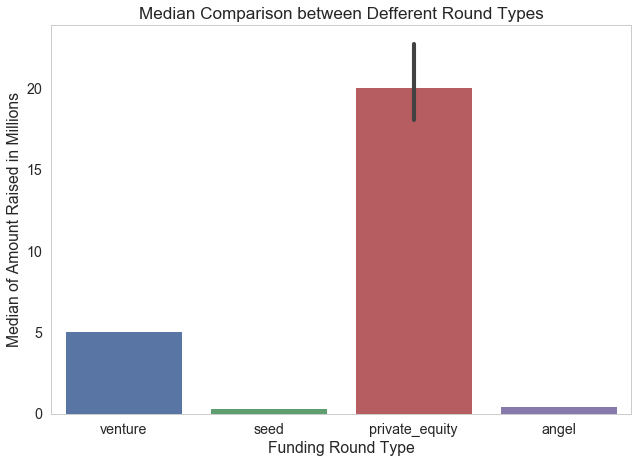

In [255]:
#Plot a bar chart
##Plot the above bar plot using the estimator parameter
zx = sns.barplot(data=master_frame_all, x="funding_round_type", y="raised_amount_usd", estimator=np.median)
zx.grid(False)
plt.xlabel("Funding Round Type")
plt.ylabel("Median of Amount Raised in Millions")
plt.title("Median Comparison between Defferent Round Types")
plt.show()

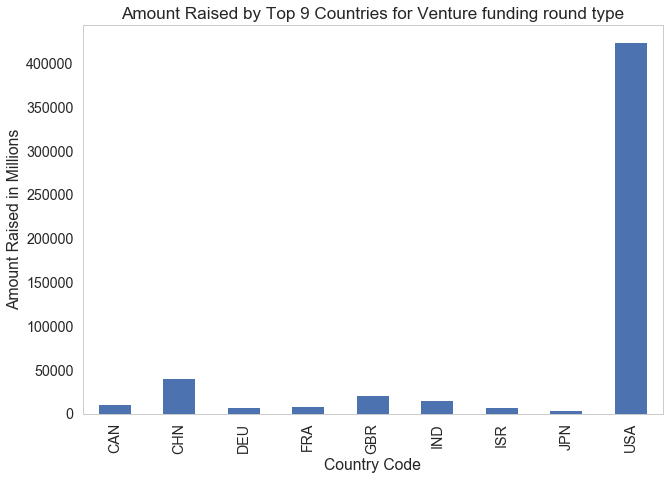

In [256]:
px = top9.groupby(['country_code'])['raised_amount_usd'].sum().plot.bar()
px.grid(False)
plt.xlabel("Country Code")
plt.ylabel("Amount Raised in Millions")
plt.title("Amount Raised by Top 9 Countries for Venture funding round type")
plt.show()

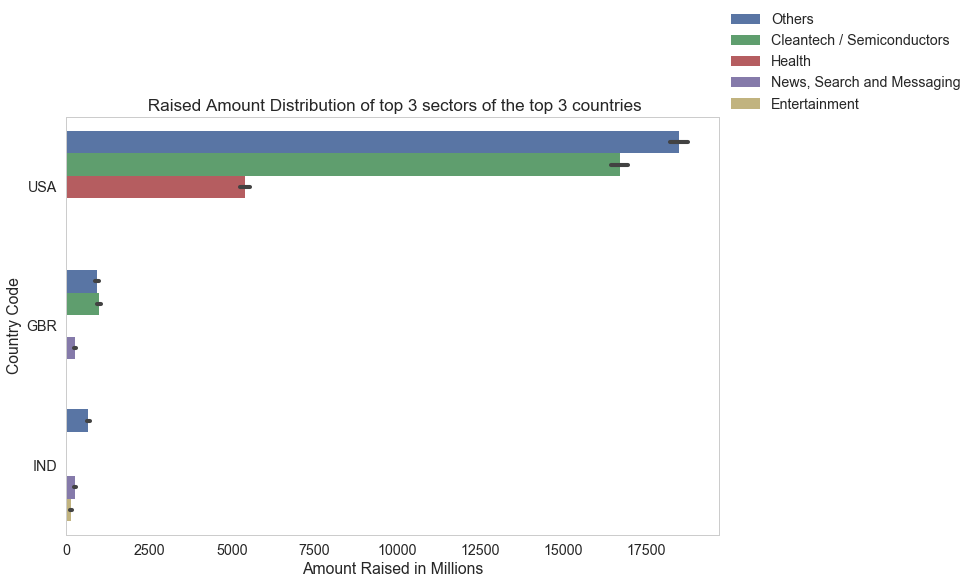

In [257]:

frames = [d1_f, d2_f, d3_f]
result = pd.concat(frames)
sns.set_context("talk", font_scale=1.1)
sns.set_style("whitegrid")
figsize=(30, 20)
ax = sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.setp(ax.get_legend().get_texts(), fontsize='18') #
ax.grid(False)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title(" Raised Amount Distribution of top 3 sectors of the top 3 countries")
plt.tight_layout()
plt.savefig("place_legend_outside_plot_Seaborn_scatterplot.png",
                    format='png',dpi=150)

plt.ylabel("Country Code")
plt.xlabel("Amount Raised in Millions")
plt.show()
